# Accuracy scores:
Logistic Regression  => 0.636531877486814

Decision Tree        => 0.978532432682520

K-Nearest Neighbor   => 0.990099009900990

---
## Import data and package

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

plt.style.use('dark_background')

In [125]:
df = pd.read_csv('/kaggle/input/mushroom-dataset/mushroom_cleaned.csv')
df

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


---
## Data Insights

In [126]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cap-diameter,54035.0,567.257204,359.883763,0.000000,289.000000,525.000000,781.000000,1891.000000
cap-shape,54035.0,4.000315,2.160505,0.000000,2.000000,5.000000,6.000000,6.000000
gill-attachment,54035.0,2.142056,2.228821,0.000000,0.000000,1.000000,4.000000,6.000000
gill-color,54035.0,7.329509,3.200266,0.000000,5.000000,8.000000,10.000000,11.000000
stem-height,54035.0,0.759110,0.650969,0.000426,0.270997,0.593295,1.054858,3.835320
stem-width,54035.0,1051.081299,782.056076,0.000000,421.000000,923.000000,1523.000000,3569.000000
stem-color,54035.0,8.418062,3.262078,0.000000,6.000000,11.000000,11.000000,12.000000
season,54035.0,0.952163,0.305594,0.027372,0.888450,0.943195,0.943195,1.804273
class,54035.0,0.549181,0.497580,0.000000,0.000000,1.000000,1.000000,1.000000


In [127]:
pd.DataFrame(df.isna().sum()).T

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,0,0,0,0,0,0,0,0,0


---
## Data Visualization


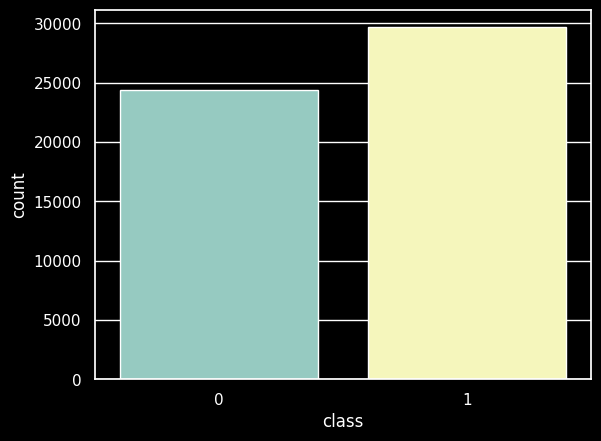

In [137]:
sns.countplot(x=df[df.columns[-1]]);

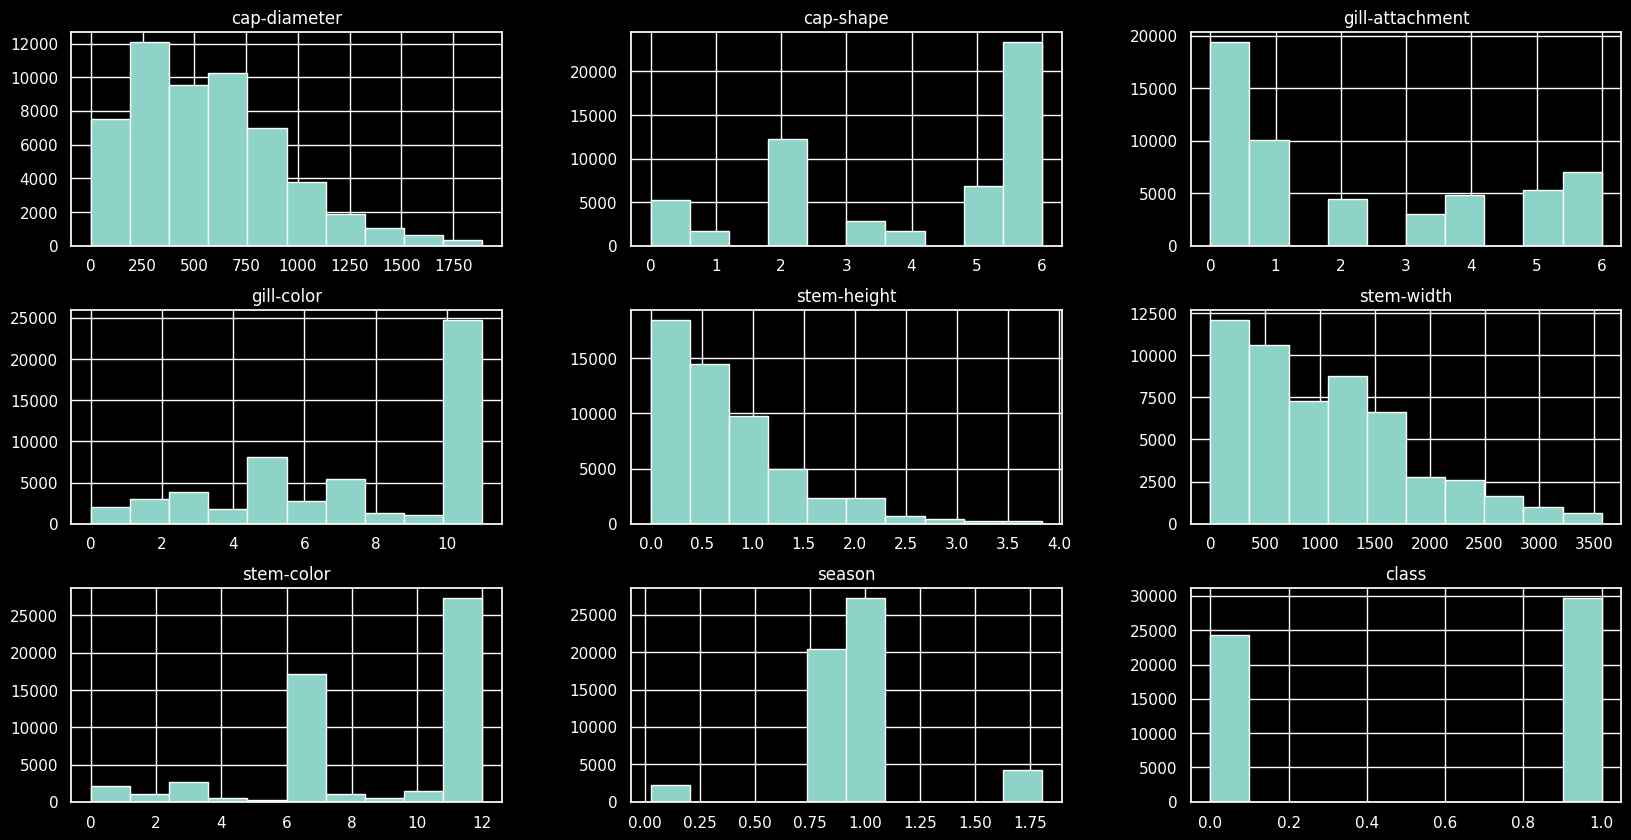

In [140]:
df.hist(figsize=(20,10));


In [143]:
ax = px.scatter_3d(df, x="stem-width", y="stem-height", z="cap-diameter", template= "plotly_dark", color="class")

ax.show()

---
## Scale the data

In [144]:
sca=MinMaxScaler()
x_scaled=sca.fit_transform(x)


In [145]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,
                                                   random_state = 42, 
                                                   test_size = 0.20)

In [147]:
x_train.shape

(43228, 8)

In [148]:
y_train.shape

(43228,)

---
## Logistic Regression


In [149]:
from sklearn.linear_model import LogisticRegression

In [150]:
log = LogisticRegression()
log.fit(x_train, y_train)

LogisticRegression()

In [151]:
# predict on test data
y_pred = log.predict(x_test)

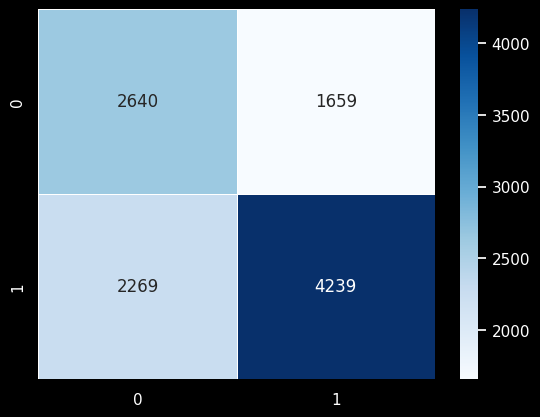

In [155]:
# confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay

sns.heatmap(confusion_matrix(y_pred, y_test), annot = True, fmt="d", cmap="Blues", linewidths=.5);


In [153]:
# classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.54      0.57      4909
           1       0.65      0.72      0.68      5898

    accuracy                           0.64     10807
   macro avg       0.63      0.63      0.63     10807
weighted avg       0.63      0.64      0.63     10807



In [154]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.6365318774868141

---
## Decision tree

In [156]:
from sklearn.tree import DecisionTreeClassifier

In [157]:
dtc = DecisionTreeClassifier(random_state= 42)

In [158]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [159]:
y_pred = dtc.predict(x_test)

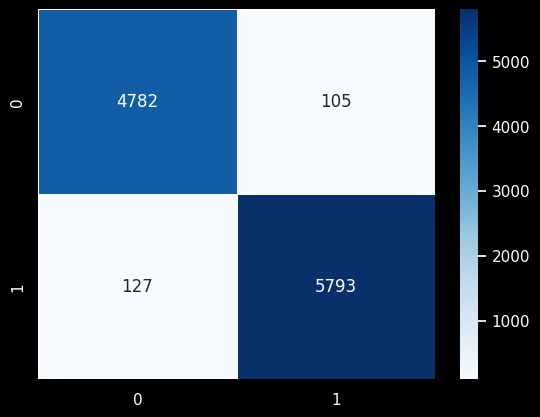

In [161]:
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred );
sns.heatmap(confusion_matrix(y_pred, y_test), annot = True, fmt="d", cmap="Blues", linewidths=.5);


In [162]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      4909
           1       0.98      0.98      0.98      5898

    accuracy                           0.98     10807
   macro avg       0.98      0.98      0.98     10807
weighted avg       0.98      0.98      0.98     10807



In [166]:
accuracy_score(y_test, y_pred)


0.9785324326825205

---
## K-Nearest Neighbor

In [164]:
from sklearn.preprocessing import StandardScaler



In [167]:
from sklearn.neighbors import KNeighborsClassifier
KNNClassifierModel = KNeighborsClassifier(n_neighbors= 10,weights ='uniform', # it can be distance
algorithm='auto') # it can be ball_tree, kd_tree,brute
KNNClassifierModel.fit(x_train, y_train)
print('KNNClassifierModel Train Score is : ' , KNNClassifierModel.score(x_train, y_train))
print('KNNClassifierModel Test Score is : ' , KNNClassifierModel.score(x_test, y_test))

KNNClassifierModel Train Score is :  0.9903303414453595
KNNClassifierModel Test Score is :  0.9900990099009901


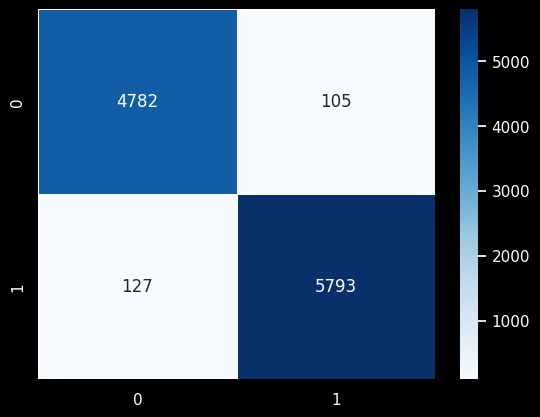

In [169]:
sns.heatmap(confusion_matrix(y_pred, y_test), annot = True, fmt="d", cmap="Blues", linewidths=.5);

In [172]:
prediction=KNNClassifierModel.predict(x_test)
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4909
           1       0.99      0.99      0.99      5898

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807



In [173]:
print("accuracy:",metrics.accuracy_score(y_test,prediction))

accuracy: 0.9900990099009901
